## Project Goal
The goal of this exercise is to analyze a dataset consisting of information from 400 credit card holders and predict the average credit card balance of a given individual. Such an exercise could be conducted as part of a customer analysis within a credit card company. The results of the analysis could determine which customers present a risk of credit default, or what the expected consumer behavior of prospective customers will be. 

Dataset : "Credit.csv"




### Dataset description
The dataset has 400 observations with the following variables:
- ID : Identification
- Income : Income in \\$1,00,000
- Limit : credit limit
- Rating : credit rating
- Cards : number of cards
- Age : age in years
- Education : number of years of education
- Gender : Male or Female
- Student : Yes or No
- Married : Yes or No
- Ethnicity : African American, Asian or Caucasian
- Balance : average monthly credit card balance across all cards owned by the customer in $



In [2]:
import pandas as pd
import numpy as np
import sklearn
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#### Load and visualize the dataset.

In [3]:
df = pd.read_csv("Credit.csv")
df['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [4]:
df.isnull().sum()

Unnamed: 0    0
ID            0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

#### Explore various encoding methodologies for categorical variables. (One-Hot and Binary encoding).

In [5]:
values = df['Ethnicity']
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[2 1 1 1 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 1 2 0 0 2 0 2 0 0 2 2 1 2 2 1 2 2
 2 2 2 0 0 1 1 2 2 1 2 1 0 0 0 2 1 1 1 1 2 2 2 1 2 2 2 0 2 1 0 2 2 2 1 1 2
 2 0 2 1 2 1 2 2 2 2 2 1 2 1 0 0 0 2 2 0 0 0 1 0 0 2 2 2 2 2 2 2 1 1 2 1 1
 0 2 1 2 0 2 1 2 2 1 2 2 0 2 2 1 2 0 0 0 1 0 0 0 0 0 1 2 0 0 2 1 0 2 1 2 2
 2 1 0 2 2 2 0 1 2 2 1 1 2 2 2 0 1 2 0 2 1 2 1 2 1 0 0 2 2 1 2 2 1 0 0 1 2
 0 0 1 0 2 2 1 1 2 0 0 0 0 0 1 0 2 2 0 2 2 2 2 0 0 2 2 2 0 2 2 1 2 1 2 1 0
 2 1 2 1 2 2 0 1 0 2 1 2 0 0 1 1 2 1 1 0 1 2 2 0 1 2 2 2 1 2 2 0 2 0 1 1 2
 2 1 1 2 0 2 0 2 1 2 2 2 2 1 1 0 2 2 2 2 2 0 0 2 2 2 1 2 2 1 2 1 2 2 0 1 2
 2 1 0 0 2 2 2 0 1 1 2 1 1 2 0 2 2 1 0 2 1 2 2 0 0 2 2 2 1 2 2 1 2 2 1 2 2
 0 2 2 2 0 2 0 0 2 0 2 1 2 1 2 2 1 2 2 0 2 1 0 2 1 2 0 2 1 0 2 1 2 2 0 2 2
 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 1 0 1 2 2 1 2 1 0 2 2 0 2 2 1]


In [6]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [7]:
enc_data = pd.get_dummies(df)

In [8]:
enc_data.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,1,1,14.891,3606,283,2,34,11,333,0,1,1,0,0,1,0,0,1
1,2,2,106.025,6645,483,3,82,15,903,1,0,0,1,0,1,0,1,0
2,3,3,104.593,7075,514,4,71,11,580,0,1,1,0,1,0,0,1,0
3,4,4,148.924,9504,681,3,36,11,964,1,0,1,0,1,0,0,1,0
4,5,5,55.882,4897,357,2,68,16,331,0,1,1,0,0,1,0,0,1


#### Center and standardize the data.
- Why is centering (zero mean) and standardizing (unit variance) of data necessary? 
- Are the ridge regression and standard least squares coefficient estimates scale invariant? Here scale invariance implies that multiplying a predictor by a constant $c$   leads to scaling of coefficient estimates by a factor of 1/ $c$ . 

#### Split dataset into training and validation set (80:20)

In [9]:
pred = enc_data.drop(columns=['Balance','Gender_Female','Student_No','Married_No','ID','Unnamed: 0'])
target = enc_data['Balance']

In [10]:
# pred = sklearn.preprocessing.normalize(pred)

In [39]:
pred.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender_Male',
       'Student_Yes', 'Married_Yes', 'Ethnicity_African American',
       'Ethnicity_Asian', 'Ethnicity_Caucasian'],
      dtype='object')

In [12]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(pred, target, test_size=0.2)
# from sklearn.preprocessing import StandardScaler
# feature_scaler = StandardScaler()
# X_train = feature_scaler.fit_transform(X_train)
# X_test = feature_scaler.transform(X_test)

#### Use linear regression. 
- Report training and validation error. 

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_test_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)
rmse_train = mean_squared_error(y_train, y_train_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)
print("Train Error: ",rmse_train,"\n","Test Error: ",rmse_test)
model.score(X_test,y_test)

Train Error:  9640.877325468298 
 Test Error:  9316.02266156083


0.9671856049785867

#### Use ridge regression for different values of the penalty coefficient $\lambda$
- Plot training and validation error vs $\lambda$. Compare with least squares regression on the same graph.
- Plot all coefficients of the model vs $\lambda$ on the same graph.
- Use k-fold cross validation / grid search to find optimal value for the hyperparameter $\lambda$. (You can use scikit-learn)

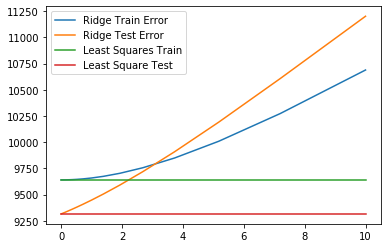

In [24]:
lamdas = np.logspace(-6,1,50)
error_train = []
error_test = []
error_rmse_train = []
error_rmse_test = []
coef = []
for i in lamdas:
    ridgeModel = Ridge(alpha = i) 
    ridgeModel.fit(X_train, y_train)
    y_train_pred_ridge = ridgeModel.predict(X_train)
    y_test_pred_ridge = ridgeModel.predict(X_test)
    ridge_train = (mean_squared_error(y_train,y_train_pred_ridge))
    error_train.append(ridge_train)
    ridge_test = (mean_squared_error(y_test,y_test_pred_ridge))
    error_test.append(ridge_test)
    error_rmse_train.append(rmse_train)
    error_rmse_test.append(rmse_test)
    ridge_coef = ridgeModel.coef_
    coef.append(ridge_coef)
plt.plot(lamdas,error_train)
plt.plot(lamdas,error_test)
plt.plot(lamdas,error_rmse_train)
plt.plot(lamdas,error_rmse_test)
# plt.plot(lamdas,coef)
plt.legend(['Ridge Train Error', 'Ridge Test Error','Least Squares Train', 'Least Square Test' ], loc='upper left')


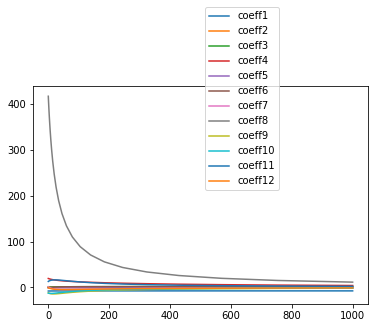

In [36]:
lam = np.logspace(-3,3,50)
coeff1 = []
coeff2 = []
coeff3 = []
coeff4 = []
coeff5 = []
coeff6 = []
coeff7 = []
coeff8 = []
coeff9 = []
coeff10 = []
coeff11 = []
coeff12 = []
for i in lam:
   ridgeModel = Ridge(alpha = i)
   ridgeModel.fit(X_train, y_train)
   coeff1.append(ridgeModel.coef_[0])
   coeff2.append(ridgeModel.coef_[1])
   coeff3.append(ridgeModel.coef_[2])
   coeff4.append(ridgeModel.coef_[3])
   coeff5.append(ridgeModel.coef_[4])
   coeff6.append(ridgeModel.coef_[5])
   coeff7.append(ridgeModel.coef_[6])
   coeff8.append(ridgeModel.coef_[7])
   coeff9.append(ridgeModel.coef_[8])
   coeff10.append(ridgeModel.coef_[9])
   coeff11.append(ridgeModel.coef_[10])
   coeff12.append(ridgeModel.coef_[11])
plt.plot(lam,coeff1)
plt.plot(lam,coeff2)
plt.plot(lam,coeff3)
plt.plot(lam,coeff4)
plt.plot(lam,coeff5)
plt.plot(lam,coeff6)
plt.plot(lam,coeff7)
plt.plot(lam,coeff8)
plt.plot(lam,coeff9)
plt.plot(lam,coeff10)
plt.plot(lam,coeff11)
plt.plot(lam,coeff12)
plt.legend(['coeff1', 'coeff2','coeff3','coeff4','coeff5','coeff6','coeff7','coeff8','coeff9','coeff10','coeff11','coeff12'], loc='best',bbox_to_anchor=(0.5, 0.5))

In [17]:
ymin = min(error_test)
xpos = error_test.index(ymin)
xpos

0

In [20]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [21]:
regr_cv = RidgeCV(alphas = np.logspace(-3,3,100))

In [22]:
model_cv = regr_cv.fit(X_train, y_train)

In [23]:
model_cv.alpha_

0.13219411484660287

In [37]:
ridgeModel = Ridge(alpha =0.001) 
ridgeModel.fit(X_train, y_train)
y_train_pred_ridge = ridgeModel.predict(X_train)
y_test_pred_ridge = ridgeModel.predict(X_test)
ridge_train = (mean_squared_error(y_train,y_train_pred_ridge))
ridge_test = (mean_squared_error(y_test,y_test_pred_ridge))
ridgeModel.score(X_test, y_test)

0.9564443715391401

####   Use lasso regression for different values of the penalty coefficient $\lambda$
- Plot training and validation error vs $\lambda$. Compare with least squares regression on the same graph.
- Plot all coefficients of the model vs $\lambda$ on the same graph.
- Use k-fold cross validation / grid search to find optimal value for the hyperparameter $\lambda$. (You can use scikit-learn)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1542541.0965874149, tolerance: 6107.0088187500005
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1542541.0462757559, tolerance: 6107.0088187500005
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1542540.9763674226, tolerance: 6107.0088187500005
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1469036.3022511224, tolerance: 6107.0088187500005
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1437124.8741456417, tolerance: 6107.0088187500005
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1389739.0922646762, tolerance: 6107.0088187500005
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

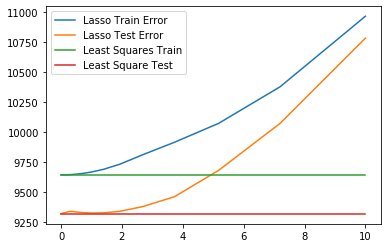

In [25]:
lamdas = np.logspace(-6,1,50)
error_train = []
error_test = []
error_rmse_train = []
error_rmse_test = []
for i in lamdas:
    LassoModel = Lasso(alpha = i) 
    LassoModel.fit(X_train, y_train)
    y_train_pred_Lasso = LassoModel.predict(X_train)
    y_test_pred_Lasso = LassoModel.predict(X_test)
    Lasso_train = (mean_squared_error(y_train,y_train_pred_Lasso))
    error_train.append(Lasso_train)
    Lasso_test = (mean_squared_error(y_test,y_test_pred_Lasso))
    error_test.append(Lasso_test)
    error_rmse_train.append(rmse_train)
    error_rmse_test.append(rmse_test)
plt.plot(lamdas,error_train)
plt.plot(lamdas,error_test)
plt.plot(lamdas,error_rmse_train)
plt.plot(lamdas,error_rmse_test)
plt.legend(['Lasso Train Error', 'Lasso Test Error','Least Squares Train', 'Least Square Test' ], loc='upper left')


C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1542411.2108589963, tolerance: 6107.0088187500005
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1542368.804956121, tolerance: 6107.0088187500005
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1542312.605302559, tolerance: 6107.0088187500005
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

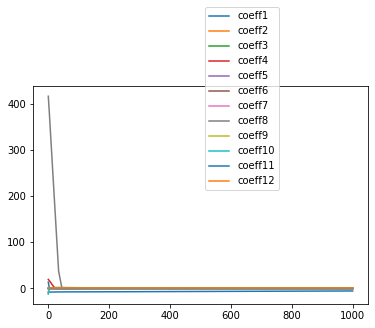

In [37]:
lam = np.logspace(-3,3,50)
coeff1 = []
coeff2 = []
coeff3 = []
coeff4 = []
coeff5 = []
coeff6 = []
coeff7 = []
coeff8 = []
coeff9 = []
coeff10 = []
coeff11 = []
coeff12 = []
for i in lam:
   lassoModel = Lasso(alpha = i)
   lassoModel.fit(X_train, y_train)
   coeff1.append(lassoModel.coef_[0])
   coeff2.append(lassoModel.coef_[1])
   coeff3.append(lassoModel.coef_[2])
   coeff4.append(lassoModel.coef_[3])
   coeff5.append(lassoModel.coef_[4])
   coeff6.append(lassoModel.coef_[5])
   coeff7.append(lassoModel.coef_[6])
   coeff8.append(lassoModel.coef_[7])
   coeff9.append(lassoModel.coef_[8])
   coeff10.append(lassoModel.coef_[9])
   coeff11.append(lassoModel.coef_[10])
   coeff12.append(lassoModel.coef_[11])
plt.plot(lam,coeff1)
plt.plot(lam,coeff2)
plt.plot(lam,coeff3)
plt.plot(lam,coeff4)
plt.plot(lam,coeff5)
plt.plot(lam,coeff6)
plt.plot(lam,coeff7)
plt.plot(lam,coeff8)
plt.plot(lam,coeff9)
plt.plot(lam,coeff10)
plt.plot(lam,coeff11)
plt.plot(lam,coeff12)
plt.legend(['coeff1', 'coeff2','coeff3','coeff4','coeff5','coeff6','coeff7','coeff8','coeff9','coeff10','coeff11','coeff12'], loc='best',bbox_to_anchor=(0.5, 0.5))

In [26]:
ymin = min(error_test)
xpos = error_test.index(ymin)

In [27]:
xpos

0

In [28]:
lass_cv = LassoCV(alphas = np.logspace(-6,1,50))

In [29]:
model_cv = lass_cv.fit(X_train, y_train)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337908.5599718585, tolerance: 4162.3638
  tol, rng, random, positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207515.51255776174, tolerance: 4162.3638
  tol, rng, random, positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146240.54337661806, tolerance: 3988.776699530517
  tol, rng, random, positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75867.44158479059, tolerance: 3988.776699530517
  tol, rng, random, positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77370.60540609667, tolerance: 3988.776699530517
  tol, rng, random, positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might w

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25192.270411252044, tolerance: 3988.776699530517
  tol, rng, random, positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25191.330611920916, tolerance: 3988.776699530517
  tol, rng, random, positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25193.778211290017, tolerance: 3988.776699530517
  tol, rng, random, positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7901.877791479463, tolerance: 4056.2138957943926
  tol, rng, random, positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7888.19247417408, tolerance: 4056.2138957943926
  tol, rng, random, positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7878.259208648233, tolerance: 4056.2138957943926
  tol, rng, random, positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might 

In [30]:
model_cv.alpha_

1.9306977288832496

In [34]:
LassoModel = Lasso(alpha = 1.9306977288832496) 
LassoModel.fit(X_train, y_train)
y_train_pred_Lasso = LassoModel.predict(X_train)
y_test_pred_Lasso = LassoModel.predict(X_test)
Lasso_train = (mean_squared_error(y_train,y_train_pred_Lasso))
Lasso_test = (mean_squared_error(y_test,y_test_pred_Lasso))
LassoModel.coef_

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1207107.6356698275, tolerance: 6107.0088187500005
  positive)


array([-7.79515108e+00,  2.02198084e-01,  9.17309631e-01,  1.81812717e+01,
       -6.07368233e-01, -1.86811803e-01,  0.00000000e+00,  3.96776417e+02,
       -2.77691335e+00, -3.40703776e+00,  6.60861944e+00, -0.00000000e+00])

#### Observations and Inferences:
- Observe and explain the difference in the behaviour of lasso and ridge coefficients as $\lambda$ increases.
- Briefly explain which of Lasso and Ridge regression would perform better in terms of validation error and the interpretability of developed models in the the following cases:
    - The output response is related to almost all predictors.
    - The output response is only related to let's say, 6 out of 40 predictors.
- List out the features selected by Lasso regression for the optimal value of $\lambda$.

1) The coefficients are close to zero in ridge regression but they don't converge. But in lasso, they converge to zero. <br>
2) Since ridge regression doesn't eleiminate variables it's better to use ridge model when output response is related to almost all predictors but lasso gives more sparser weights and almost eliminates coefficients, it's better to use it for output resposne is only related to 6 out of 40 predictors <br>
3) The features selected are ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Student_Yes', 'Married_Yes', 'Ethnicity_African American',
       'Ethnicity_Asian']

#### Bonus (Optional) : 
- Try out Best Subset Selection, Forward Stepwise Selection, Backward Stepwise Selection and Recursive Feature Elimination for feature selection. Compare the selected features, validation error and computational complexity for the above with Lasso/Ridge regression.
- Use elastic net regression and compare validation error with ridge and lasso regession.